# The Technology, Driving Experience, and Its Influence on Adoption

This section explores how technological perceptions and driving experience shape the adoption of electric vehicles (EVs) in France. Survey data was analyzed to understand the relationships between:

- **Vehicle ownership and usage patterns**  
  (Type and number of vehicles, household size, main uses)
- **Experience and familiarity with EVs**  
  (Driving or riding in an EV, practical understanding, perceived ease of use)
- **Perceptions of technology**  
  (Fit with lifestyle, perceived durability, symbolic value: innovation, environment, modernity)
- **Motivations and barriers**  
  (Main drivers and obstacles related to EV technology)
- **Influence of user profile**  
  (Age, geographic area, and their impact on technological perceptions and adoption intent)

## Setup

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import chi2_contingency
import re
from scipy.stats import kruskal
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import spearmanr
from IPython.display import display

In [2]:
def extract_after_newline_parentheses(col):
    match = re.search(r'\n\s*\((.*?)\)', col)
    if match:
        return match.group(1)
    match = re.search(r'\(([^()]*(?:\([^)]*\)[^()]*)*)\)\s*$', col)
    if match:
        return match.group(1)
    return None

def extract_before_newline_parentheses(col):
    match = re.search(r'^(.*?)\s*\n', col)
    if match:
        return match.group(1)
    match = re.search(r'^(.*?)\s*\(', col)
    if match:
        return match.group(1)
    return col
def get_labels_and_title(cols):
    labels = [extract_after_newline_parentheses(col) for col in cols]
    title = extract_before_newline_parentheses(cols[0])
    return labels, title



In [3]:
df = pd.read_csv(r'c:\Users\Mango\Downloads\FinalEvAdoptionInFranceResults.csv')
for col in df.columns:
    values = df[col].dropna().astype(str)
    split_vals = []
    for val in values:
        split_vals.extend([v.strip() for v in val.split(',') if v.strip()])
    unique_vals = pd.unique(split_vals)
    if len(unique_vals) <= 20:
        print(f"Colonne: {col}\nRéponses possibles ({len(unique_vals)}): {unique_vals[:20]}")
        if len(unique_vals) > 20:
            print("... (troncature à 20 valeurs)")
        print("-" * 60)
print(list(df.columns))

C:\Users\Mango\AppData\Local\Temp\ipykernel_43280\507991816.py:7: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_vals = pd.unique(split_vals)
C:\Users\Mango\AppData\Local\Temp\ipykernel_43280\507991816.py:7: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_vals = pd.unique(split_vals)
C:\Users\Mango\AppData\Local\Temp\ipykernel_43280\507991816.py:7: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_vals = pd.unique(split_vals)
C:\Users\Mango\AppData\Local\Temp\ipykernel_43280\507991816.py:7: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_vals = pd.unique(

Colonne: Combien êtes-vous dans votre foyer ?
Réponses possibles (10): ['4' '2' '5' '1' '3' '6' '9' '7' '8' '11']
------------------------------------------------------------
Colonne: Habitez-vous dans :
Réponses possibles (4): ['Une ville moyenne' 'Une grande ville' 'Une zone périurbaine'
 'Une zone rurale']
------------------------------------------------------------
Colonne: Avez-vous accès à une place de parking personnelle ?
Réponses possibles (4): ['Oui'
 "avec borne de recharge ou possibilité d'en installer une (à domicile ou en résidence par exemple)"
 'Non' "sans borne de recharge ou possibilité d'en installer une"]
------------------------------------------------------------
Colonne: Combien de véhicules personnels utilisez-vous dans votre foyer ?
Réponses possibles (7): ['2' '0' '1' '3' '4' '7' '5']
------------------------------------------------------------
Colonne: Pourquoi n'avez-vous pas de véhicule ?

Réponses possibles (7): ["Je n'ai pas de permis de conduire"
 'Je vi

KeyboardInterrupt: 

## **Vehicle ownership and usage patterns**  
  (Type and number of vehicles, household size, main uses)

Nombre de répondants possédant un VE : 33
Nombre de possesseurs de VE ayant aussi un autre véhicule (thermique ou hybride) : 26
Proportion : 78.79%


C:\Users\Mango\AppData\Local\Temp\ipykernel_42160\1830896098.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)"].fillna(False).astype(bool) |
C:\Users\Mango\AppData\Local\Temp\ipykernel_42160\1830896098.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)"].fillna(False).astype(bool) |
C:\Users\Mango\AppData\Local\Temp\ipy

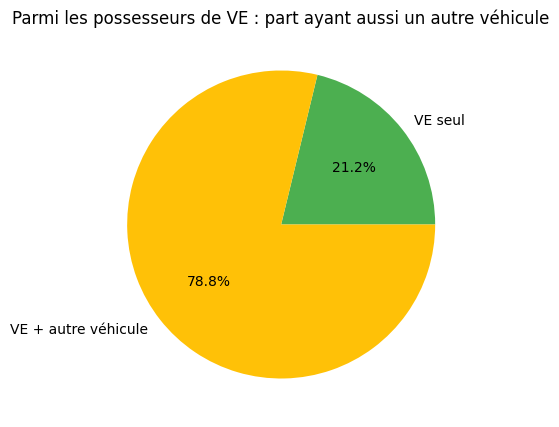

In [ ]:
# Analyse : Les possesseurs de VE possèdent-ils souvent un autre véhicule thermique ou hybride ?

# 1. Création d'un masque pour les possesseurs de VE
mask_ev = df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)"] == True

# 2. Pour ces répondants, regarde s'ils ont aussi coché un autre type (essence/diesel ou hybride)
df['autre_vehicule'] = (
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)"].fillna(False).astype(bool) |
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)"].fillna(False).astype(bool) |
    df["Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride rechargeable)"].fillna(False).astype(bool)
)

# 3. Statistiques descriptives
nb_ev = mask_ev.sum()
nb_ev_avec_autre = df.loc[mask_ev, 'autre_vehicule'].sum()
part_ev_avec_autre = nb_ev_avec_autre / nb_ev if nb_ev > 0 else np.nan

print(f"Nombre de répondants possédant un VE : {nb_ev}")
print(f"Nombre de possesseurs de VE ayant aussi un autre véhicule (thermique ou hybride) : {nb_ev_avec_autre}")
print(f"Proportion : {part_ev_avec_autre:.2%}")

# 4. Visualisation
labels = ['VE seul', 'VE + autre véhicule']
sizes = [
    nb_ev - nb_ev_avec_autre,
    nb_ev_avec_autre
]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'])
plt.title("Parmi les possesseurs de VE : part ayant aussi un autre véhicule")
plt.show()

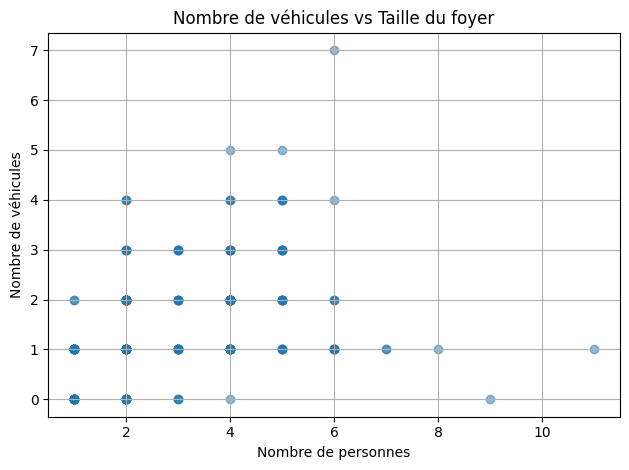

,nb_personnes,nb_vehicules,Nombre de foyers
0,1,0,13
1,1,1,19
2,1,2,2
3,2,0,10
4,2,1,23
5,2,2,35
6,2,3,5
7,2,4,3
8,3,0,3
9,3,1,11


In [ ]:
df['nb_vehicules'] = pd.to_numeric(df['Combien de véhicules personnels utilisez-vous dans votre foyer ?'], errors='coerce')
df['nb_personnes'] = pd.to_numeric(df['Combien êtes-vous dans votre foyer ?'], errors='coerce')

plt.scatter(df['nb_personnes'], df['nb_vehicules'], alpha=0.5)
plt.title("Nombre de véhicules vs Taille du foyer")
plt.xlabel("Nombre de personnes")
plt.ylabel("Nombre de véhicules")
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage résumé sous forme de tableau
counts = df.groupby(['nb_personnes', 'nb_vehicules']).size().reset_index(name='Nombre de foyers')
display(counts.sort_values(['nb_personnes', 'nb_vehicules']))


Moyenne par groupe (Sans VE / Avec VE) :


,nb_personnes,nb_vehicules
owns_ev,,
Sans VE,3.070352,1.537688
Avec VE,3.242424,2.303030


Nombre moyen de véhicules par taille de foyer et présence d'un VE (après nettoyage) :


owns_ev,False,True
nb_personnes,,
1,0.580645,1.000000
2,1.267857,1.833333
3,1.363636,2.666667
4,1.888889,2.100000
5,2.450000,2.800000
6,1.600000,NaN
7,1.000000,NaN
8,1.000000,NaN
9,0.000000,NaN


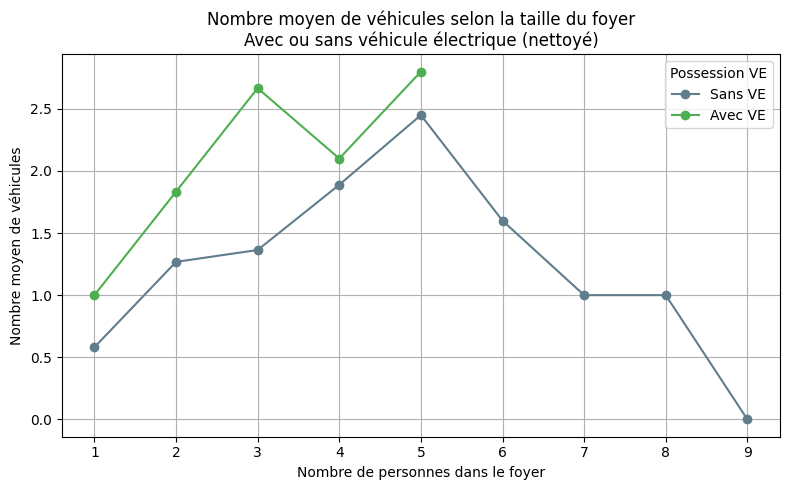

In [ ]:

# Nettoyage des points aberrants pour nb_personnes et nb_vehicules
# Critères :
# - nb_personnes < 1 ou > 10
# - nb_vehicules < 0 ou > 10
# - nb_vehicules > nb_personnes

df_clean = df[
    (df['nb_personnes'].between(1, 10)) &
    (df['nb_vehicules'].between(0, 10)) &
    (df['nb_vehicules'] <= df['nb_personnes'])
].copy()

# Statistiques descriptives par groupe
stats = df.groupby('owns_ev')[['nb_personnes', 'nb_vehicules']].mean().rename(index={False: "Sans VE", True: "Avec VE"})
print("Moyenne par groupe (Sans VE / Avec VE) :")
display(stats)

# On regroupe par taille du foyer (nb_personnes) et possession d'un VE
pivot = df_clean.groupby(['nb_personnes', 'owns_ev'])['nb_vehicules'].mean().unstack()

print("Nombre moyen de véhicules par taille de foyer et présence d'un VE (après nettoyage) :")
display(pivot)

pivot.plot(kind='line', marker='o', figsize=(8,5), color=['#607d8b', '#4caf50'])
plt.title("Nombre moyen de véhicules selon la taille du foyer\nAvec ou sans véhicule électrique (nettoyé)")
plt.xlabel("Nombre de personnes dans le foyer")
plt.ylabel("Nombre moyen de véhicules")
plt.legend(["Sans VE", "Avec VE"], title="Possession VE")
plt.grid(True)
plt.tight_layout()
plt.show()

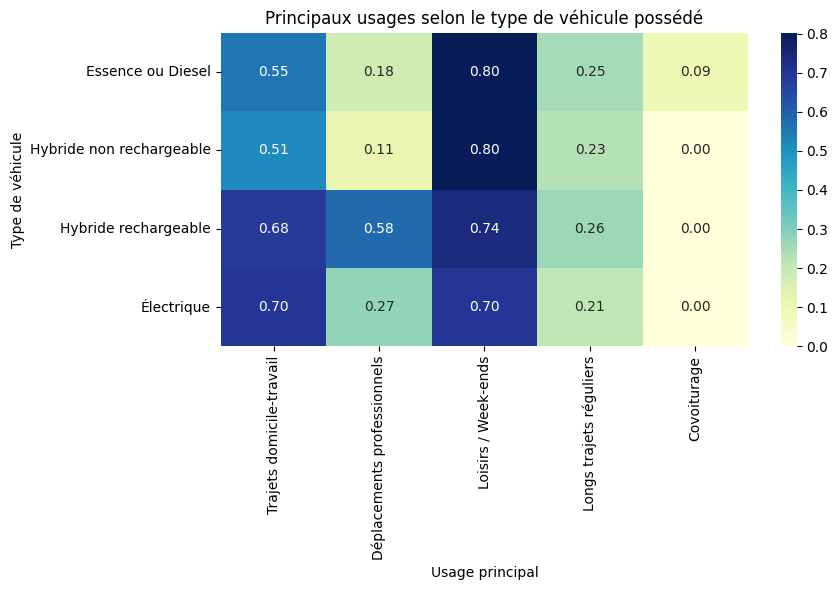

Proportion de répondants ayant coché chaque usage par type de véhicule :


C:\Users\Mango\AppData\Local\Temp\ipykernel_42160\912088717.py:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(usage_df.applymap(lambda x: f"{x:.1%}" if pd.notnull(x) else "N/A"))


,Trajets domicile-travail,Déplacements professionnels,Loisirs / Week-ends,Longs trajets réguliers,Covoiturage
Essence ou Diesel,55.4%,18.1%,80.2%,24.9%,9.0%
Hybride non rechargeable,51.4%,11.4%,80.0%,22.9%,0.0%
Hybride rechargeable,68.4%,57.9%,73.7%,26.3%,0.0%
Électrique,69.7%,27.3%,69.7%,21.2%,0.0%


In [ ]:
vehicle_types = {
    "Essence ou Diesel": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Essence ou Diesel)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule essence / diesel ? (Covoiturage)'
    ],
    "Hybride non rechargeable": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride non rechargeable)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule hybride non rechargeable ? (Covoiturage)'
    ],
    "Hybride rechargeable": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Hybride rechargeable)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Trajets domicile-travail)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Déplacements professionnels)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Loisirs / Week-ends)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Longs trajets réguliers)',
        'Quels sont les principaux usages de votre véhicule hybride rechargeable ? (Covoiturage)'
    ],
    "Électrique": [
        'Quels types de véhicules possédez vous dans votre foyer (plusieurs réponses possibles) \n (Électrique)',
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Trajets domicile-travail)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Déplacements professionnels)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Loisirs / Week-ends)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Longs trajets réguliers)",
        "Quels sont lesprincipaux usages de votre véhicule électrique ? (Covoiturage)"
    ]
}

# Utilise la fonction pour obtenir les labels d'usages et le titre
usage_labels, title = get_labels_and_title([
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Trajets domicile-travail)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Déplacements professionnels)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Loisirs / Week-ends)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Longs trajets réguliers)',
    'Quels sont les principaux usages de votre véhicule essence / diesel ? (Covoiturage)'
])

usage_matrix = []
for vtype, cols in vehicle_types.items():
    owner_col = cols[0]
    usage_cols = cols[1:]
    mask = df[owner_col] == True
    if mask.sum() == 0:
        usage_matrix.append([np.nan]*len(usage_cols))
        continue
    means = df.loc[mask, usage_cols].mean().values
    usage_matrix.append(means)

usage_df = pd.DataFrame(usage_matrix, columns=usage_labels, index=list(vehicle_types.keys()))

plt.figure(figsize=(9,6))
sns.heatmap(usage_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Principaux usages selon le type de véhicule possédé")
plt.xlabel("Usage principal")
plt.ylabel("Type de véhicule")
plt.tight_layout()
plt.show()

# Affichage des valeurs en format tableau

print("Proportion de répondants ayant coché chaque usage par type de véhicule :")
display(usage_df.applymap(lambda x: f"{x:.1%}" if pd.notnull(x) else "N/A"))



In [ ]:
from scipy.stats import pearsonr

# Assure que les colonnes existent et sont numériques
if 'nb_personnes' not in df.columns or 'nb_vehicules' not in df.columns:
    df['nb_vehicules'] = pd.to_numeric(df['Combien de véhicules personnels utilisez-vous dans votre foyer ?'], errors='coerce')
    df['nb_personnes'] = pd.to_numeric(df['Combien êtes-vous dans votre foyer ?'], errors='coerce')

# Retire les lignes où l'une des deux valeurs est manquante
valid = df[['nb_personnes', 'nb_vehicules']].dropna()
corr, pval = pearsonr(valid['nb_personnes'], valid['nb_vehicules'])
print(f"Corrélation personnes-véhicules : r = {corr:.2f}, p = {pval:.8f}")

if pval < 0.05:
    print("✅ Il existe une corrélation statistiquement significative entre le nombre de personnes et le nombre de véhicules dans le foyer.")
else:
    print("❌ Aucune corrélation significative détectée entre le nombre de personnes et le nombre de véhicules dans le foyer.")

Corrélation personnes-véhicules : r = 0.30, p = 0.00000340
✅ Il existe une corrélation statistiquement significative entre le nombre de personnes et le nombre de véhicules dans le foyer.


## **Experience and familiarity with EVs**  
  (Driving or riding in an EV, practical understanding, perceived ease of use)

C:\Users\Mango\AppData\Local\Temp\ipykernel_42160\1571505045.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df['type_vehicule'] = df[vehicle_cols].idxmax(axis=1)


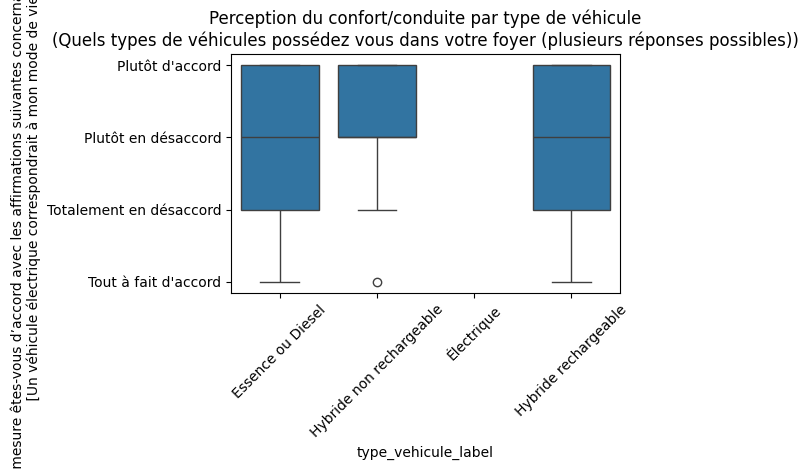

Score moyen de perception du confort/conduite par type de véhicule :
Essence ou Diesel: 2.30
Hybride non rechargeable: 2.31
Hybride rechargeable: 2.60
Électrique: nan
ANOVA: F = 0.29, p = 0.7462
❌ Pas de différence significative entre les types de véhicules pour la perception du confort/conduite.


In [ ]:
labels, title = get_labels_and_title(vehicle_cols)
df['type_vehicule'] = df[vehicle_cols].idxmax(axis=1)
df['type_vehicule_label'] = df['type_vehicule'].map(dict(zip(vehicle_cols, labels)))

sns.boxplot(data=df, x='type_vehicule_label', y=driving_exp_col)
plt.title(f"Perception du confort/conduite par type de véhicule\n({title})")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen de perception du confort/conduite par type de véhicule :")
for label in labels:
    mask = df['type_vehicule_label'] == label
    mean_val = df.loc[mask, driving_exp_col].map(likert_map).mean()
    print(f"{label}: {mean_val:.2f}")

from scipy.stats import f_oneway

# Utilise le score numérique pour l'ANOVA
groups = []
for col in vehicle_cols:
    vals = df.loc[df[col] == True, driving_exp_col + "_score"].dropna()
    if len(vals) >= 2:
        groups.append(vals)

if len(groups) >= 2:
    fval, pval = f_oneway(*groups)
    print(f"ANOVA: F = {fval:.2f}, p = {pval:.4f}")
    if pval < 0.05:
        print("✅ Différence significative entre les types de véhicules pour la perception du confort/conduite.")
    else:
        print("❌ Pas de différence significative entre les types de véhicules pour la perception du confort/conduite.")
else:
    print("Pas assez de données dans chaque groupe pour faire une ANOVA valide.")


Score moyen adoption pour ceux qui ne possèdent pas de VE :
2.3668341708542715
Score moyen intention de racheter pour ceux qui possèdent un VE :
3.2903225806451615
Available columns: ['Submission ID', 'Respondent ID', 'Submitted at', 'Combien êtes-vous dans votre foyer ?', 'Habitez-vous dans :', 'Avez-vous accès à une place de parking personnelle ?', 'Combien de véhicules personnels utilisez-vous dans votre foyer ?', "Pourquoi n'avez-vous pas de véhicule ?\n", "Pourquoi n'avez-vous pas de véhicule ?\n (Je n'ai pas de permis de conduire)", "Pourquoi n'avez-vous pas de véhicule ?\n (Les frais)", "Pourquoi n'avez-vous pas de véhicule ?\n (Je vis dans une zone bien desservie par les transports en commun)", "Pourquoi n'avez-vous pas de véhicule ?\n (Je n'ai pas besoin de voiture pour mes trajets quotidiens)", "Pourquoi n'avez-vous pas de véhicule ?\n (Le vélo, la marche ou d'autres moyens de transport me conviennent)", "Pourquoi n'avez-vous pas de véhicule ?\n (Je préfère ne pas être dépend

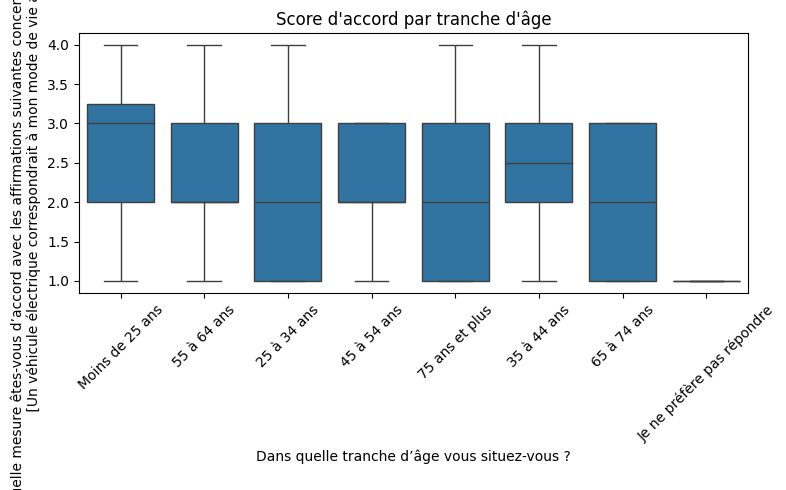

Score moyen d'accord par tranche d'âge :


,Score moyen
Dans quelle tranche d’âge vous situez-vous ?,
25 à 34 ans,2.18
35 à 44 ans,2.45
45 à 54 ans,2.11
55 à 64 ans,2.30
65 à 74 ans,2.05
75 ans et plus,2.11
Je ne préfère pas répondre,1.00
Moins de 25 ans,2.90


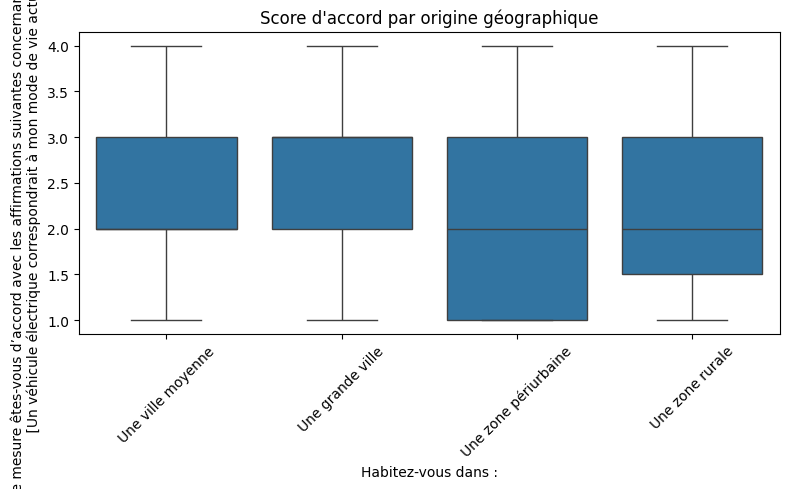

Score moyen d'accord par origine géographique :


,Score moyen
Habitez-vous dans :,
Une grande ville,2.61
Une ville moyenne,2.26
Une zone périurbaine,2.15
Une zone rurale,2.26


C:\Users\Mango\AppData\Local\Temp\ipykernel_42160\3158855947.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=labels)


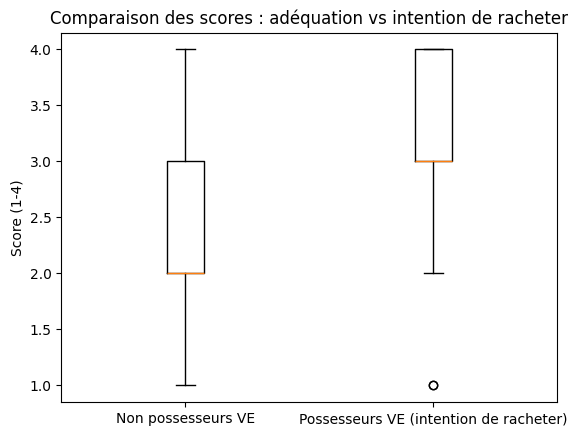

Valeurs des scores (adéquation vs intention de racheter) :
Non possesseurs VE :


,Statistiques
count,199.00
mean,2.37
std,0.91
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,4.00


Possesseurs VE (intention de racheter) :


,Statistiques
count,31.00
mean,3.29
std,0.82
min,1.00
25%,3.00
50%,3.00
75%,4.00
max,4.00


In [ ]:
from IPython.display import display

# 1. Score moyen selon la possession d'un VE
print("Score moyen adoption pour ceux qui ne possèdent pas de VE :")
print(df.loc[df['owns_ev'] == False, "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"].mean())
print("Score moyen intention de racheter pour ceux qui possèdent un VE :")
print(df.loc[df['owns_ev'] == True, "repurchase_score"].mean())
# 2. Répartition du score par tranche d'âge
# Print columns to check for the exact column name
print("Available columns:", list(df.columns))

# Use the exact column name as it appears in df.columns
age_col = [col for col in df.columns if "tranche d’âge" in col][0]
score_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=age_col, y=score_col)
plt.title("Score d'accord par tranche d'âge")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen d'accord par tranche d'âge :")
display(df.groupby(age_col)[score_col].mean().round(2).to_frame("Score moyen"))

# 3. Répartition du score par origine géographique
geo_col = "Habitez-vous dans :"
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=geo_col, y=score_col)
plt.title("Score d'accord par origine géographique")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des valeurs en format texte
print("Score moyen d'accord par origine géographique :")
display(df.groupby(geo_col)[score_col].mean().round(2).to_frame("Score moyen"))

scores = [
    df.loc[df['owns_ev'] == False, "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"].dropna(),
    df.loc[df['owns_ev'] == True, "repurchase_score"].dropna()
]
labels = ["Non possesseurs VE", "Possesseurs VE (intention de racheter)"]

plt.boxplot(scores, labels=labels)
plt.ylabel("Score (1-4)")
plt.title("Comparaison des scores : adéquation vs intention de racheter")
plt.show()

# Affichage des valeurs en format texte
print("Valeurs des scores (adéquation vs intention de racheter) :")
for label, vals in zip(labels, scores):
    print(f"{label} :")
    display(vals.describe().round(2).to_frame("Statistiques"))

Expérience VE (déjà monté/conduit) :


,Nombre de répondants
exp_ev,
2.0,70
3.0,68
1.0,33



Score moyen de connaissance selon expérience :


,Score moyen de connaissance
exp_ev,
1.0,1.82
2.0,2.07
3.0,2.41



Intention d'adopter selon expérience :


,Intention d'adopter (moyenne)
exp_ev,
1.0,0.43
2.0,0.50
3.0,0.65



Comparaison du score de connaissance :
  - Moyenne sans expérience VE : 1.82 (n=33)
  - Moyenne avec expérience VE : 2.24 (n=138)
  - T-test : t = 2.62, p-value = 0.0115

Comparaison de l'intention d'adopter :
  - Moyenne sans expérience VE : 0.43 (n=21)
  - Moyenne avec expérience VE : 0.57 (n=108)
  - T-test : t = 1.21, p-value = 0.2375

Analyse des résultats :
- Les personnes ayant déjà conduit ou été passager d'un VE ont un score de connaissance significativement plus élevé que celles sans expérience.
- L'expérience avec un VE n'est pas associée à une différence significative d'intention d'adopter dans cet échantillon.


<Figure size 600x400 with 0 Axes>

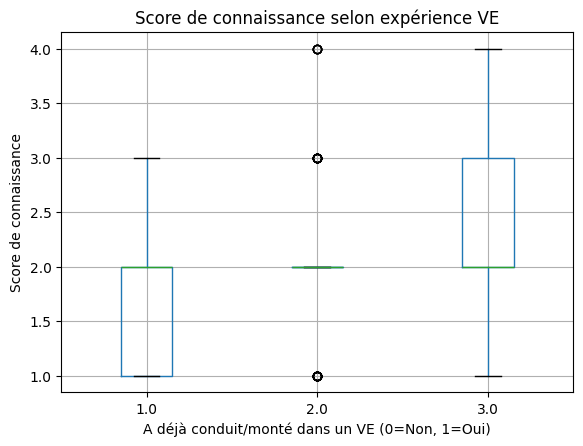

In [ ]:
# 1. Nettoyage des variables
exp_col = "Avez-vous déjà eu l’occasion de conduire ou de monter dans un véhicule électrique ?"
connaissance_col = "À quel point diriez-vous que vous connaissez bien les offres actuelles de véhicules électriques et d'infrastructures associées ?"

# Recodage expérience : 1 = Oui, 0 = Non
df['exp_ev'] = df[exp_col].map({'Oui, j’ai conduit': 3,'Oui, j’étais passager': 2,'Non, jamais': 1})

# Recodage connaissance : suppose une échelle 1-5 ou texte, à adapter si besoin
# Si c'est déjà numérique, pas besoin de map
connaissance_map = {
        "Pas du tout, je ne m’y suis jamais vraiment intéressé": 1,
        "Un peu, je connais quelques modèles et options": 2,
        "Assez bien, je vois passer des informations": 3,
        "Très bien, je suis régulièrement les nouveautés": 4
    }
df['connaissance_score'] = df[connaissance_col].map(connaissance_map)

# 2. Statistiques descriptives
print("Expérience VE (déjà monté/conduit) :")
display(df['exp_ev'].value_counts(dropna=True).to_frame("Nombre de répondants"))
print("\nScore moyen de connaissance selon expérience :")
display(df.groupby('exp_ev')['connaissance_score'].mean().round(2).to_frame("Score moyen de connaissance"))
print("\nIntention d'adopter selon expérience :")
display(df.groupby('exp_ev')['intention_adopter'].mean().round(2).to_frame("Intention d'adopter (moyenne)"))



# 3. Test statistique : expérience vs connaissance (t-test)
from scipy.stats import ttest_ind
from IPython.display import display
group_noexp = df[df['exp_ev'] == 1]['connaissance_score'].dropna()
group_exp = df[df['exp_ev'] > 1]['connaissance_score'].dropna()
tstat, pval = ttest_ind(group_exp, group_noexp, equal_var=False)
print(f"\nComparaison du score de connaissance :")
print(f"  - Moyenne sans expérience VE : {group_noexp.mean():.2f} (n={len(group_noexp)})")
print(f"  - Moyenne avec expérience VE : {group_exp.mean():.2f} (n={len(group_exp)})")
print(f"  - T-test : t = {tstat:.2f}, p-value = {pval:.4f}")

# 4. Test statistique : expérience vs intention d'adopter (t-test)
group_noexp2 = df[df['exp_ev'] == 1]['intention_adopter'].dropna()
group_exp2 = df[df['exp_ev'] > 1]['intention_adopter'].dropna()
tstat2, pval2 = ttest_ind(group_exp2, group_noexp2, equal_var=False)
print(f"\nComparaison de l'intention d'adopter :")
print(f"  - Moyenne sans expérience VE : {group_noexp2.mean():.2f} (n={len(group_noexp2)})")
print(f"  - Moyenne avec expérience VE : {group_exp2.mean():.2f} (n={len(group_exp2)})")
print(f"  - T-test : t = {tstat2:.2f}, p-value = {pval2:.4f}")

# Analyse des résultats
print("\nAnalyse des résultats :")
if pval < 0.05:
    print("- Les personnes ayant déjà conduit ou été passager d'un VE ont un score de connaissance significativement plus élevé que celles sans expérience.")
else:
    print("- Aucune différence significative de connaissance entre les groupes selon l'expérience VE.")

if pval2 < 0.05:
    print("- L'expérience avec un VE est associée à une intention d'adopter significativement plus forte.")
else:
    print("- L'expérience avec un VE n'est pas associée à une différence significative d'intention d'adopter dans cet échantillon.")

# 5. Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
df.boxplot(column='connaissance_score', by='exp_ev')
plt.title("Score de connaissance selon expérience VE")
plt.suptitle("")
plt.xlabel("A déjà conduit/monté dans un VE (0=Non, 1=Oui)")
plt.ylabel("Score de connaissance")
plt.show()




## **Perceptions of technology**  
  (Fit with lifestyle, perceived durability, symbolic value: innovation, environment, modernity)

In [ ]:
driving_exp_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]"

# Recodage échelle 4 points
likert_map = {
    "Totalement en désaccord": 1,
    "Plutôt en désaccord": 2,
    "Plutôt d'accord": 3,
    "Tout à fait d'accord": 4,
    "Tout à fait d’accord": 4,  # gestion des accents différents
}

df[driving_exp_col + "_score"] = df[driving_exp_col].map(likert_map)

# Vérification du recodage

print("Distribution des réponses brutes :")
display(df[driving_exp_col].value_counts().to_frame("Nombre de répondants"))

print("Distribution des scores recodés :")
display(df[driving_exp_col + "_score"].value_counts().to_frame("Nombre de répondants"))

# Utilisation pour les moyennes par type de véhicule
results = []
for col in vehicle_cols:
    avg = df[df[col] == True][driving_exp_col + "_score"].mean()
    label = col.split('(')[-1][:-1]
    results.append({"Type de véhicule": label, "Score moyen": avg})
display(pd.DataFrame(results))

Distribution des réponses brutes :


,Nombre de répondants
Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [Un véhicule électrique correspondrait à mon mode de vie actuel],
Plutôt d'accord,72
Plutôt en désaccord,68
Totalement en désaccord,39
Tout à fait d'accord,20


Distribution des scores recodés :


,Nombre de répondants
Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [Un véhicule électrique correspondrait à mon mode de vie actuel]_score,
3.0,72
2.0,68
1.0,39
4.0,20


,Type de véhicule,Score moyen
0,Essence ou Diesel,2.300654
1,Hybride non rechargeable,2.406250
2,Hybride rechargeable,2.222222
3,Électrique,NaN


,Réponse,Nombre de répondants
0,Plutôt en désaccord,94
1,Plutôt d'accord,50
2,Totalement en désaccord,37
3,NaN,33
4,Tout à fait d'accord,18


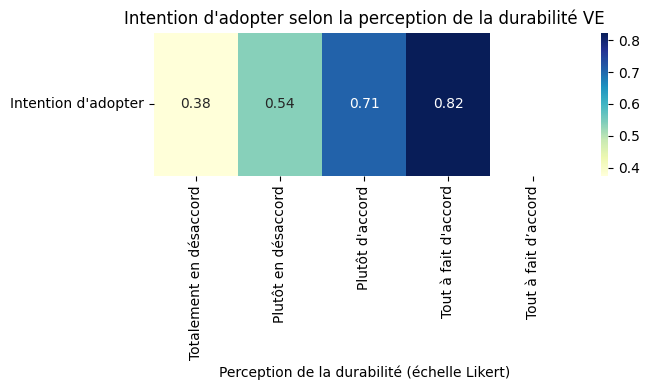

Proportion d'intention d'adopter selon la perception de la durabilité :
Totalement en désaccord: 37.50%
Plutôt en désaccord: 53.73%
Plutôt d'accord: 70.73%
Tout à fait d'accord: 82.35%
Tout à fait d’accord: N/A
Corrélation score durabilité <-> intention d'adopter : r = 0.29, p = 0.0003
✅ La perception de la durabilité est significativement liée à l'intention d'adopter.

Tableau croisé possession VE x perception durabilité :


Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [La durabilité d'un véhicule électrique est équivalente à celle d'un véhicule thermique],Plutôt d'accord,Plutôt en désaccord,Totalement en désaccord,Tout à fait d'accord
owns_ev,,,,
False,50,94,37,18



Pourcentage par perception de la durabilité et possession VE :


Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ? [La durabilité d'un véhicule électrique est équivalente à celle d'un véhicule thermique],Plutôt d'accord,Plutôt en désaccord,Totalement en désaccord,Tout à fait d'accord
owns_ev,,,,
False,0.25,0.47,0.19,0.09


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr

durability_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [La durabilité d'un véhicule électrique est équivalente à celle d'un véhicule thermique]"

# 1. Distribution des réponses
# Affichage de la distribution des réponses sous forme de tableau
distribution = df[durability_col].value_counts(dropna=False).rename_axis("Réponse").reset_index(name="Nombre de répondants")
display(distribution)

# 2. Croisement avec intention d'adopter
if 'intention_adopter' in df.columns:
    import matplotlib.pyplot as plt
    # Un boxplot n'est pas très informatif ici car la variable 'intention_adopter' est binaire (0/1).
    # Une heatmap ou un barplot des moyennes par modalité de perception serait plus lisible.

    # Calcul de la moyenne d'intention d'adopter par modalité de perception de la durabilité
    mean_intention_by_durability = df.groupby(durability_col)['intention_adopter'].mean().reindex([
        "Totalement en désaccord", "Plutôt en désaccord", "Plutôt d'accord", "Tout à fait d'accord", "Tout à fait d’accord"
    ])
    plt.figure(figsize=(7,4))
    sns.heatmap(mean_intention_by_durability.values.reshape(1, -1), annot=True, fmt=".2f",
                xticklabels=mean_intention_by_durability.index, yticklabels=["Intention d'adopter"], cmap="YlGnBu")
    plt.title("Intention d'adopter selon la perception de la durabilité VE")
    plt.xlabel("Perception de la durabilité (échelle Likert)")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Affichage des valeurs en format texte
    print("Proportion d'intention d'adopter selon la perception de la durabilité :")
    for label, value in mean_intention_by_durability.items():
        print(f"{label}: {value:.2%}" if pd.notna(value) else f"{label}: N/A")

    # Test statistique (ANOVA si Likert numérique)
    # Recodage si besoin
    df['durability_score'] = df[durability_col].map(likert_map)
    valid = df[['durability_score', 'intention_adopter']].dropna()
    if not valid.empty:
        r, p = pearsonr(valid['durability_score'], valid['intention_adopter'])
        print(f"Corrélation score durabilité <-> intention d'adopter : r = {r:.2f}, p = {p:.4f}")
        if p < 0.05:
            print("✅ La perception de la durabilité est significativement liée à l'intention d'adopter.")
        else:
            print("❌ Pas de lien significatif entre perception de la durabilité et intention d'adopter.")

# 3. Croisement avec la possession d'un VE
if 'owns_ev' in df.columns:
    ct = pd.crosstab(df['owns_ev'], df[durability_col])
    print("\nTableau croisé possession VE x perception durabilité :")
    display(ct)

    # Affichage en pourcentage par ligne
    ct_pct = ct.div(ct.sum(axis=1), axis=0).round(2)
    print("\nPourcentage par perception de la durabilité et possession VE :")
    display(ct_pct)

## **Motivations and barriers**  
(Main drivers and obstacles related to EV technology)

## **Influence of user profile**  
  (Age, geographic area, and their impact on technological perceptions and adoption intent)

In [ ]:
from scipy.stats import f_oneway

# Test ANOVA : score d'accord selon la tranche d'âge
age_col = "Dans quelle tranche d’âge vous situez-vous ?\n"
score_col = "Dans quelle mesure êtes-vous d’accord avec les affirmations suivantes concernant les véhicules électriques ?\n [Un véhicule électrique correspondrait à mon mode de vie actuel]_score"

df_age = df[df[age_col] != "Je ne préfère pas répondre"]

# On crée une liste de groupes (un par tranche d'âge, sans NaN)
groups = [g[score_col].dropna() for _, g in df_age.groupby(age_col) if g[score_col].notna().sum() > 1]

if len(groups) >= 2:
    fval, pval = f_oneway(*groups)
    print(f"ANOVA score d'accord par âge : F = {fval:.2f}, p = {pval:.4f}")
    if pval < 0.05:
        print("✅ Différence significative entre les groupes d'âge.")
    else:
        print("❌ Pas de différence significative entre les groupes d'âge.")
else:
    print("Pas assez de groupes pour faire une ANOVA valide.")

# Test ANOVA : score d'accord selon l'origine géographique
geo_col = "Habitez-vous dans :"
groups_geo = [g[score_col].dropna() for _, g in df.groupby(geo_col) if g[score_col].notna().sum() > 1]

if len(groups_geo) >= 2:
    fval_geo, pval_geo = f_oneway(*groups_geo)
    print(f"ANOVA score d'accord par origine géographique : F = {fval_geo:.2f}, p = {pval_geo:.4f}")
    if pval_geo < 0.05:
        print("✅ Différence significative entre les zones géographiques.")
    else:
        print("❌ Pas de différence significative entre les zones géographiques.")
else:
    print("Pas assez de groupes pour faire une ANOVA valide (origine géographique).")
# Moyenne du score par âge
# Moyenne du score par âge
mean_by_age = df.groupby(age_col)[score_col].mean().round(2)
display(mean_by_age.to_frame("Score moyen par âge"))

# Moyenne du score par zone géographique
mean_by_geo = df.groupby(geo_col)[score_col].mean().round(2)
display(mean_by_geo.to_frame("Score moyen par zone géographique"))


ANOVA score d'accord par âge : F = 4.45, p = 0.0003
✅ Différence significative entre les groupes d'âge.
ANOVA score d'accord par origine géographique : F = 2.97, p = 0.0330
✅ Différence significative entre les zones géographiques.


,Score moyen par âge
Dans quelle tranche d’âge vous situez-vous ?,
25 à 34 ans,2.18
35 à 44 ans,2.45
45 à 54 ans,2.11
55 à 64 ans,2.30
65 à 74 ans,2.05
75 ans et plus,2.11
Je ne préfère pas répondre,1.00
Moins de 25 ans,2.90


,Score moyen par zone géographique
Habitez-vous dans :,
Une grande ville,2.61
Une ville moyenne,2.26
Une zone périurbaine,2.15
Une zone rurale,2.26


## **multivariate (cross) analyses** 